# Neural Networks image recognition - MultiLayer Perceptron
Use both MLNN for the following problem.

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.

# `np.random.normal`

## Parameters

### loc

Mean (“centre”) of the distribution.

### scale

Standard deviation (spread or “width”) of the distribution. Must be non-negative.

### size

Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if loc and scale are both scalars. Otherwise, np.broadcast(loc, scale).size samples are drawn.

# Neural Networks - Image Recognition 

In [84]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

## Multi Layer Neural Network
Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).

### Without Noise

In [85]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [86]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [87]:
batch_size = 128
num_classes = 10
epochs = 20


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 512)               401920    
                                                                 
 dropout_40 (Dropout)        (None, 512)               0         
                                                                 
 dense_61 (Dense)            (None, 512)               262656    
                                                                 
 dropout_41 (Dropout)        (None, 512)               0         
                                                                 
 dense_62 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20


2022-11-06 19:29:05.261298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.2439 - accuracy: 0.9252

2022-11-06 19:29:10.250477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 6s 11ms/step - loss: 0.2439 - accuracy: 0.9252 - val_loss: 0.1192 - val_accuracy: 0.9625
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1021 - accuracy: 0.9687 - val_loss: 0.0747 - val_accuracy: 0.9765
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0738 - accuracy: 0.9779 - val_loss: 0.0707 - val_accuracy: 0.9793
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0591 - accuracy: 0.9822 - val_loss: 0.0833 - val_accuracy: 0.9768
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0495 - accuracy: 0.9853 - val_loss: 0.0747 - val_accuracy: 0.9812
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0430 - accuracy: 0.9879 - val_loss: 0.0777 - val_accuracy: 0.9819
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0362 - accuracy: 0.9891 - val_loss: 0.0825 - val_accuracy: 0.9827
Epoch 8/20

### With Noise

In [88]:
import numpy as np
import matplotlib.pyplot as plt

In [120]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [121]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train_noise = np.random.normal(x_train)
x_test_noise = np.random.normal(x_test)

print(x_train_noise.shape[0], 'train samples')
print(x_test_noise.shape[0], 'test samples')

60000 train samples
10000 test samples


In [122]:
x_train_noise[2]

array([ 1.22289552e-01,  9.37949546e-01,  1.25482326e+00,  1.63183460e-01,
        2.66003182e+00,  1.23812908e+00,  5.65104027e-01, -2.28444325e-01,
       -1.55362444e+00, -4.12486185e-01, -1.64996292e+00,  9.13524556e-01,
        1.41618773e+00,  1.03575641e+00,  3.14567410e-01,  1.15772854e-01,
       -5.21060430e-02,  1.03025597e-01,  1.16196142e+00, -4.16944948e-01,
       -8.58160319e-01, -3.14299343e-01,  1.69538194e-01, -2.02897417e-01,
        7.52219218e-01,  3.84351218e-01,  6.28754769e-01,  6.24037690e-01,
        2.05509390e+00,  1.53772080e+00, -1.20658422e+00, -3.81010924e-01,
       -9.68826727e-01, -1.03803353e-01, -1.57274432e+00, -5.03517550e-01,
       -1.35099565e+00, -3.94380860e-01,  1.94724637e+00,  1.28039156e+00,
       -1.30575467e+00, -6.09353185e-01, -1.42702398e+00, -1.75340062e+00,
        8.94263061e-02, -1.10475863e+00,  7.52091750e-02,  4.54132398e-01,
       -3.88847761e-01, -6.60370366e-03, -1.19085127e+00,  7.47452977e-01,
        1.50777946e+00,  

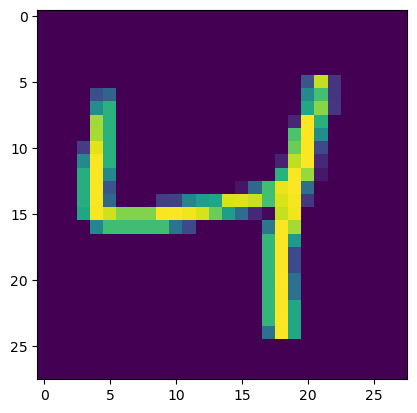

In [123]:
plt.imshow(x_train[2].reshape(28,28))

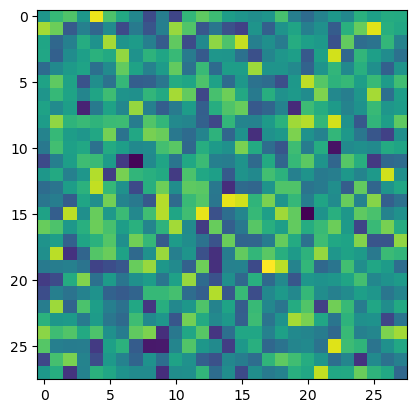

In [124]:
plt.imshow(x_train_noise[2].reshape(28,28))

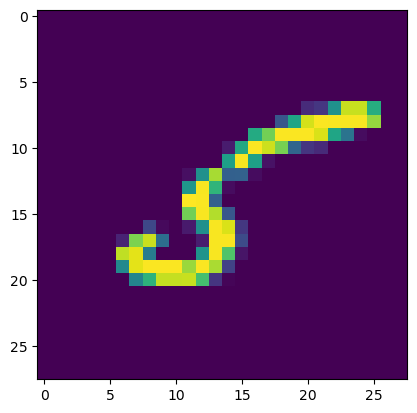

In [125]:
plt.imshow(x_train[11].reshape(28,28))

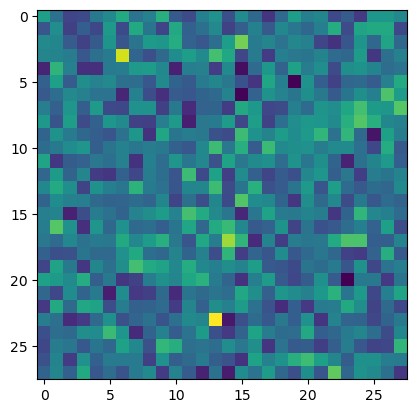

In [126]:
plt.imshow(x_train_noise[11].reshape(28,28))

In [127]:
batch_size = 128
num_classes = 10
epochs = 20


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history_noise = model.fit(x_train_noise, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_noise, y_test))
score = model.evaluate(x_test_noise, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 512)               401920    
                                                                 
 dropout_58 (Dropout)        (None, 512)               0         
                                                                 
 dense_88 (Dense)            (None, 512)               262656    
                                                                 
 dropout_59 (Dropout)        (None, 512)               0         
                                                                 
 dense_89 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20


2022-11-06 20:22:22.848332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 1.0831 - accuracy: 0.6335

2022-11-06 20:22:27.902059: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 6s 11ms/step - loss: 1.0831 - accuracy: 0.6335 - val_loss: 0.8155 - val_accuracy: 0.7235
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.6630 - accuracy: 0.7783 - val_loss: 0.7184 - val_accuracy: 0.7635
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.4463 - accuracy: 0.8494 - val_loss: 0.7602 - val_accuracy: 0.7601
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2959 - accuracy: 0.9005 - val_loss: 0.8732 - val_accuracy: 0.7541
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2077 - accuracy: 0.9287 - val_loss: 0.9877 - val_accuracy: 0.7560
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1598 - accuracy: 0.9458 - val_loss: 1.1200 - val_accuracy: 0.7511
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1330 - accuracy: 0.9546 - val_loss: 1.2151 - val_accuracy: 0.7544
Epoch 8/20

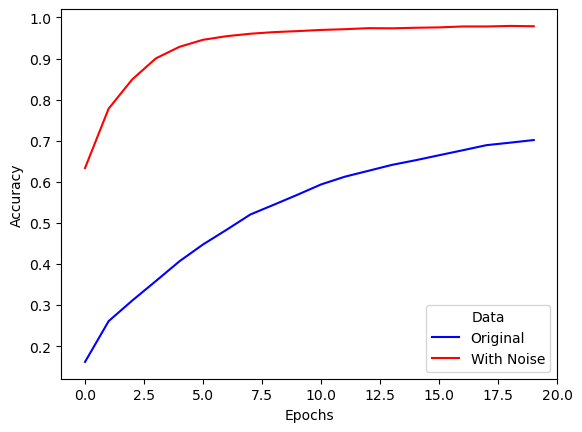

In [139]:
plt.plot(history.history['accuracy'],c='b',label='Original')
plt.plot(history_noise.history['accuracy'],c='red',label='With Noise')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xlim(-1,20)
plt.legend(title='Data')
plt.show()

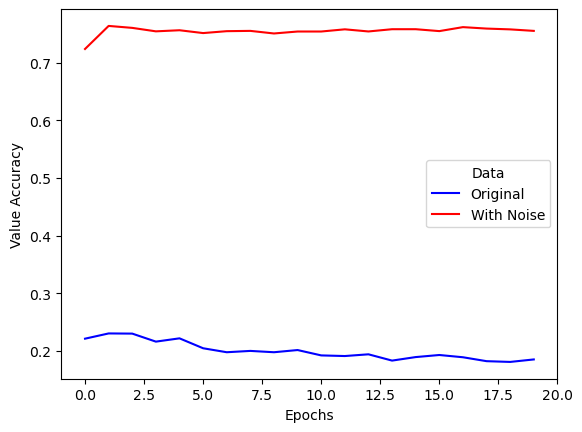

In [138]:
plt.plot(history.history['val_accuracy'],c='b',label='Original')
plt.plot(history_noise.history['val_accuracy'],c='red',label='With Noise')
plt.ylabel('Value Accuracy')
plt.xlabel('Epochs')
plt.xlim(-1,20)
plt.legend(title='Data')
plt.show()

## Varying scales

In [130]:
scales = [.1, .5, 1.0, 2.0, 4.0]
accuracies = []
vals = []

for scale in scales:
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    
    x_train = x_train.reshape(60000, 784)
    x_test = x_test.reshape(10000, 784)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255

    x_train = np.random.normal(x_train,scale=scale)
    x_test = np.random.normal(x_test,scale=scale)
    
    batch_size = 128
    num_classes = 10
    epochs = 20
    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
    score = model.evaluate(x_test_noise, y_test, verbose=0)
    
    accuracies.append(history.history['accuracy'])
    vals.append(history.history['val_accuracy'])
    

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 512)               401920    
                                                                 
 dropout_60 (Dropout)        (None, 512)               0         
                                                                 
 dense_91 (Dense)            (None, 512)               262656    
                                                                 
 dropout_61 (Dropout)        (None, 512)               0         
                                                                 
 dense_92 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
  1/469 [...........................

2022-11-06 20:28:17.200792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.2609 - accuracy: 0.9201

2022-11-06 20:28:22.184542: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 6s 11ms/step - loss: 0.2609 - accuracy: 0.9201 - val_loss: 0.1267 - val_accuracy: 0.9604
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0983 - accuracy: 0.9693 - val_loss: 0.1036 - val_accuracy: 0.9642
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0590 - accuracy: 0.9813 - val_loss: 0.1026 - val_accuracy: 0.9739
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0400 - accuracy: 0.9876 - val_loss: 0.1160 - val_accuracy: 0.9729
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0307 - accuracy: 0.9902 - val_loss: 0.1170 - val_accuracy: 0.9742
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0217 - accuracy: 0.9930 - val_loss: 0.1351 - val_accuracy: 0.9731
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0194 - accuracy: 0.9941 - val_loss: 0.1665 - val_accuracy: 0.9734
Epoch 8/20

2022-11-06 20:30:05.851009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.5430 - accuracy: 0.8232

2022-11-06 20:30:11.026604: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 6s 12ms/step - loss: 0.5430 - accuracy: 0.8232 - val_loss: 0.3222 - val_accuracy: 0.8943
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2372 - accuracy: 0.9258 - val_loss: 0.2819 - val_accuracy: 0.9117
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1235 - accuracy: 0.9584 - val_loss: 0.3077 - val_accuracy: 0.9149
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0684 - accuracy: 0.9777 - val_loss: 0.3625 - val_accuracy: 0.9139
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0485 - accuracy: 0.9835 - val_loss: 0.4249 - val_accuracy: 0.9129
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0383 - accuracy: 0.9869 - val_loss: 0.4637 - val_accuracy: 0.9143
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0316 - accuracy: 0.9893 - val_loss: 0.5539 - val_accuracy: 0.9096
Epoch 8/20

2022-11-06 20:31:56.258092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 1.0770 - accuracy: 0.6356

2022-11-06 20:32:01.551294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 6s 12ms/step - loss: 1.0770 - accuracy: 0.6356 - val_loss: 0.8246 - val_accuracy: 0.7266
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.6665 - accuracy: 0.7761 - val_loss: 0.7537 - val_accuracy: 0.7516
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.4492 - accuracy: 0.8472 - val_loss: 0.7612 - val_accuracy: 0.7578
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2977 - accuracy: 0.8986 - val_loss: 0.8683 - val_accuracy: 0.7586
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1997 - accuracy: 0.9311 - val_loss: 1.0700 - val_accuracy: 0.7537
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1554 - accuracy: 0.9462 - val_loss: 1.1856 - val_accuracy: 0.7503
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1356 - accuracy: 0.9541 - val_loss: 1.2733 - val_accuracy: 0.7516
Epoch 8/20

2022-11-06 20:33:45.149831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 1.8757 - accuracy: 0.3575

2022-11-06 20:33:50.338433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 6s 12ms/step - loss: 1.8757 - accuracy: 0.3575 - val_loss: 1.6040 - val_accuracy: 0.4425
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 1.4649 - accuracy: 0.4960 - val_loss: 1.5831 - val_accuracy: 0.4463
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 1.2627 - accuracy: 0.5650 - val_loss: 1.6168 - val_accuracy: 0.4446
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 1.0621 - accuracy: 0.6323 - val_loss: 1.6911 - val_accuracy: 0.4354
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.8884 - accuracy: 0.6946 - val_loss: 1.8169 - val_accuracy: 0.4317
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.7546 - accuracy: 0.7393 - val_loss: 1.9546 - val_accuracy: 0.4201
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.6426 - accuracy: 0.7761 - val_loss: 2.0978 - val_accuracy: 0.4203
Epoch 8/20

2022-11-06 20:35:33.396996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 2.4128 - accuracy: 0.1618

2022-11-06 20:35:38.627213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 6s 12ms/step - loss: 2.4128 - accuracy: 0.1618 - val_loss: 2.1558 - val_accuracy: 0.2211
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 2.0679 - accuracy: 0.2610 - val_loss: 2.1365 - val_accuracy: 0.2302
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 1.9355 - accuracy: 0.3111 - val_loss: 2.1508 - val_accuracy: 0.2299
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 1.8047 - accuracy: 0.3586 - val_loss: 2.1962 - val_accuracy: 0.2160
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 1.6830 - accuracy: 0.4067 - val_loss: 2.2615 - val_accuracy: 0.2217
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 1.5700 - accuracy: 0.4478 - val_loss: 2.3431 - val_accuracy: 0.2045
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 1.4728 - accuracy: 0.4836 - val_loss: 2.4042 - val_accuracy: 0.1976
Epoch 8/20

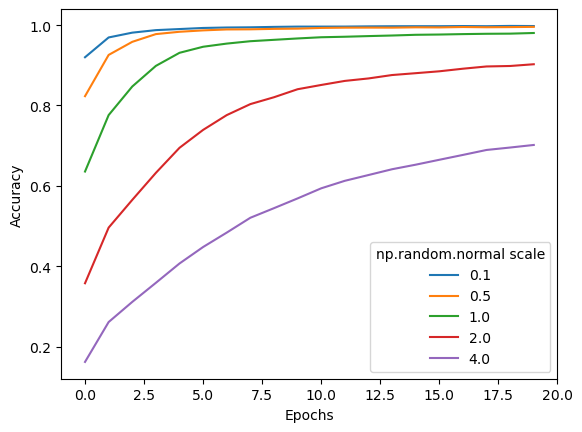

In [136]:
for i in range(0,len(accuracies)):
    plt.plot(accuracies[i],label=scales[i])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xlim(-1,20)
plt.legend(title='np.random.normal scale')
plt.show()

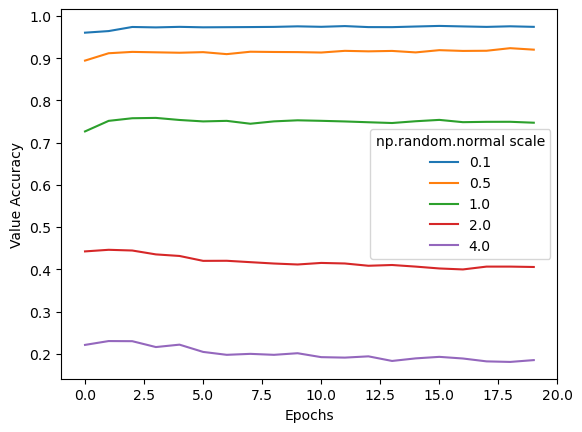

In [137]:
for i in range(0,len(vals)):
    plt.plot(vals[i],label=scales[i])
plt.ylabel('Value Accuracy')
plt.xlabel('Epochs')
plt.xlim(-1,20)
plt.legend(title='np.random.normal scale')
plt.show()